In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# importing the dataframe
df = pd.read_csv("crop.csv")

# Feature Engineering

no columns / rows to delete

no NaN entries

### Deriving absolute humidity from relative humidity found in the dataset

the formula for absolute humidity from relative humidity is as follows:

**AH = (RH x Ps) / (c x T x 100)**


**AH** = absolute humidity

**RH** = relative humidity

**Ps** = Saturation vapor pressure [ignored in calculation]

**c** = Gas constant for water vapor, (c ​= 461.5 J/(kg⋅K)) [ignored in calculation]

**T** = Temperature



In [3]:

#  deriving absolute humidity and adding it as a new column
df["abs_humidity"] = df.apply(lambda row: row.humidity / (row.temperature * 100), axis = 1)


# renaming humidity column into rel_humidity for better understanding
df.rename(columns = {"humidity" : "rel_humidity"}, inplace = True)

# reordering df columns
df = df.reindex(columns = ["N", "P", "K", "temperature", "rel_humidity", "ph", "rainfall", "abs_humidity", "label"])


df.head()


,N,P,K,temperature,rel_humidity,ph,rainfall,abs_humidity,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0.039274,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0.036894,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0.035785,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0.030259,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0.040539,rice


In [4]:
# defining features and labels

feature_columns = ["N", "P", "K", "temperature", "rel_humidity", "ph", "rainfall", "abs_humidity"]

x = df[feature_columns]
y = df["label"]

# getting unique label names from the df into a list for later use
labels = y.unique().tolist()

# Preprocessing for models

-stratification is important

In [5]:
# splitting data into two groups

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 1)

In [6]:
# normalizing split data

scaler = preprocessing.StandardScaler()

temp = scaler.fit_transform(x_train)
x_train_normalized = pd.DataFrame(temp)

temp2 = scaler.fit_transform(x_test)
x_test_normalized = pd.DataFrame(temp2)


In [7]:
# scaling the columns for using in visualizations

min_max_scaler = preprocessing.MinMaxScaler()
temp = min_max_scaler.fit_transform(x)
x_scaled = pd.DataFrame(temp, columns = feature_columns)

# stitching the label column 
df_scaled = x_scaled.assign(label = y)
df_scaled.head()

,N,P,K,temperature,rel_humidity,ph,rainfall,abs_humidity,label
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458,0.372304,rice
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675,0.344971,rice
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710,0.332232,rice
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905,0.268765,rice
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231,0.386830,rice


# Exploring The Data

In [8]:
df.describe()

,N,P,K,temperature,rel_humidity,ph,rainfall,abs_humidity
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,0.028775
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,0.011566
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.006857
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,0.021478
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,0.029995
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,0.034311
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,0.093928


In [9]:
print(df.head(), df.tail())


    N   P   K  temperature  rel_humidity        ph    rainfall  abs_humidity  \
0  90  42  43    20.879744     82.002744  6.502985  202.935536      0.039274   
1  85  58  41    21.770462     80.319644  7.038096  226.655537      0.036894   
2  60  55  44    23.004459     82.320763  7.840207  263.964248      0.035785   
3  74  35  40    26.491096     80.158363  6.980401  242.864034      0.030259   
4  78  42  42    20.130175     81.604873  7.628473  262.717340      0.040539   

  label  
0  rice  
1  rice  
2  rice  
3  rice  
4  rice           N   P   K  temperature  rel_humidity        ph    rainfall  \
2195  107  34  32    26.774637     66.413269  6.780064  177.774507   
2196   99  15  27    27.417112     56.636362  6.086922  127.924610   
2197  118  33  30    24.131797     67.225123  6.362608  173.322839   
2198  117  32  34    26.272418     52.127394  6.758793  127.175293   
2199  104  18  30    23.603016     60.396475  6.779833  140.937041   

      abs_humidity   label  
2195     

In [10]:
print(df.size, df.shape)


19800 (2200, 9)


In [11]:
# check if there's null data in the df
df.isnull().sum()

N               0
P               0
K               0
temperature     0
rel_humidity    0
ph              0
rainfall        0
abs_humidity    0
label           0
dtype: int64

In [12]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

## Descriptive Statistics

Text(0.5, 1.0, 'Correlations Between Features')

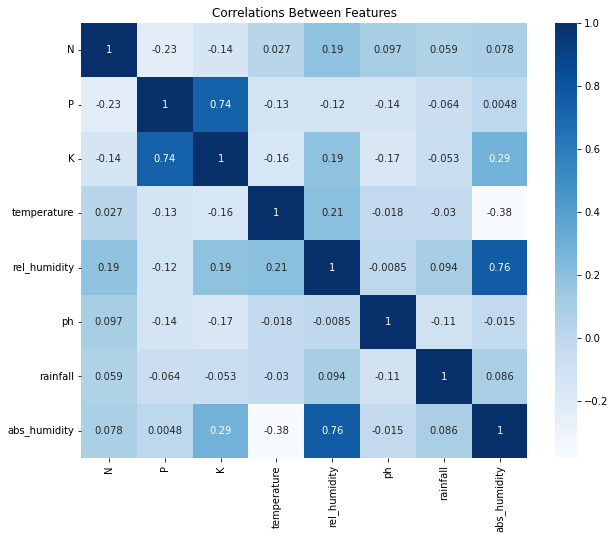

In [13]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot=True, cmap = "Blues")
plt.title("Correlations Between Features")


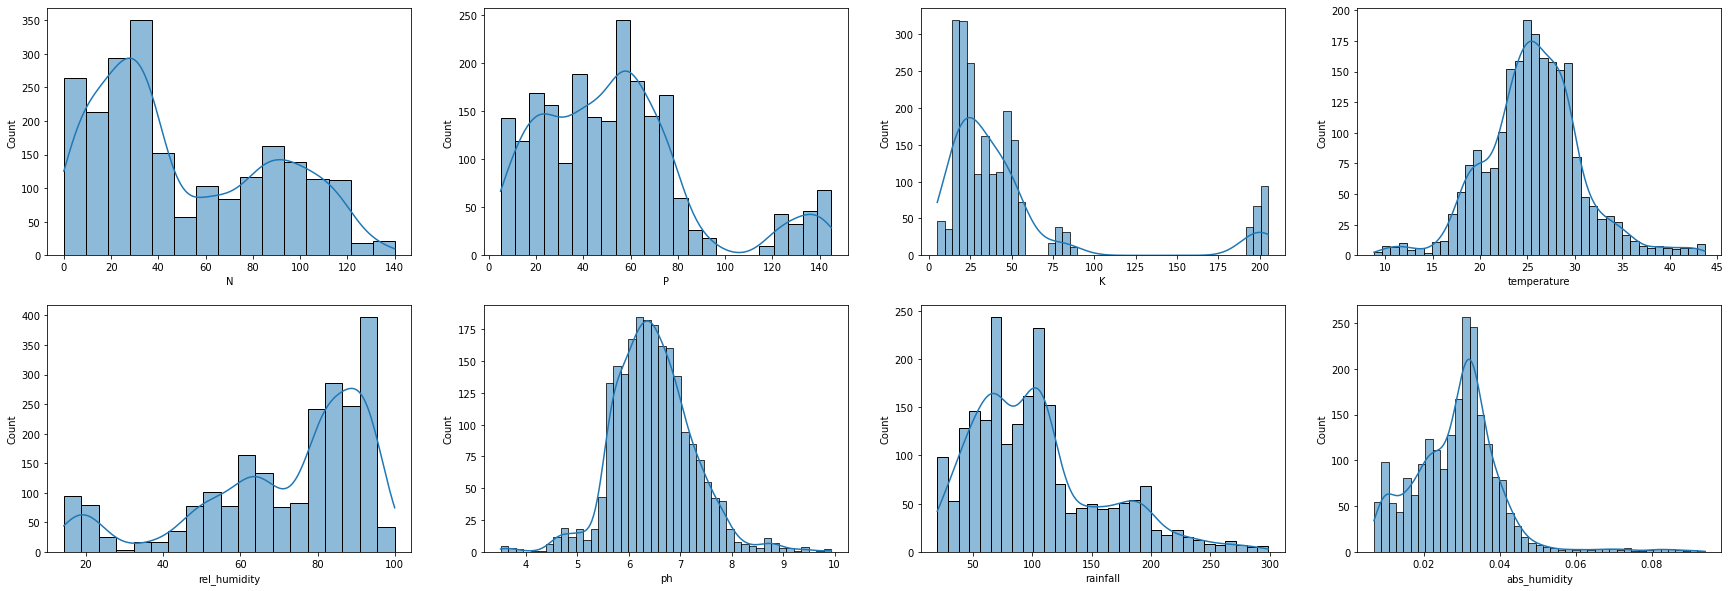

In [14]:
# distributions of features

plt.figure(figsize=(30,10))

i = 1
for column in feature_columns:
    plt.subplot(2,4,i)
    sns.histplot(df[column], kde = True, palette = "Blues")
    i += 1
plt.show()


Text(0, 0.5, 'Value')

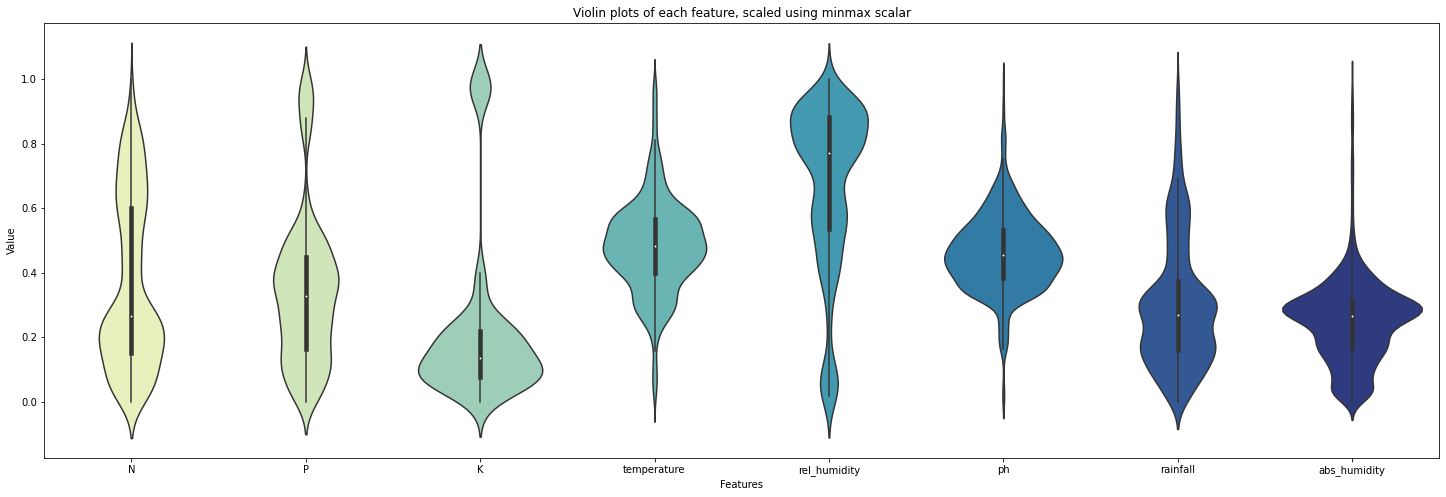

In [15]:
plt.figure(figsize = (25, 8))
sns.violinplot(data = df_scaled, palette = "YlGnBu")
plt.title("Violin plots of each feature, scaled using minmax scalar")
plt.xlabel("Features")
plt.ylabel("Value")

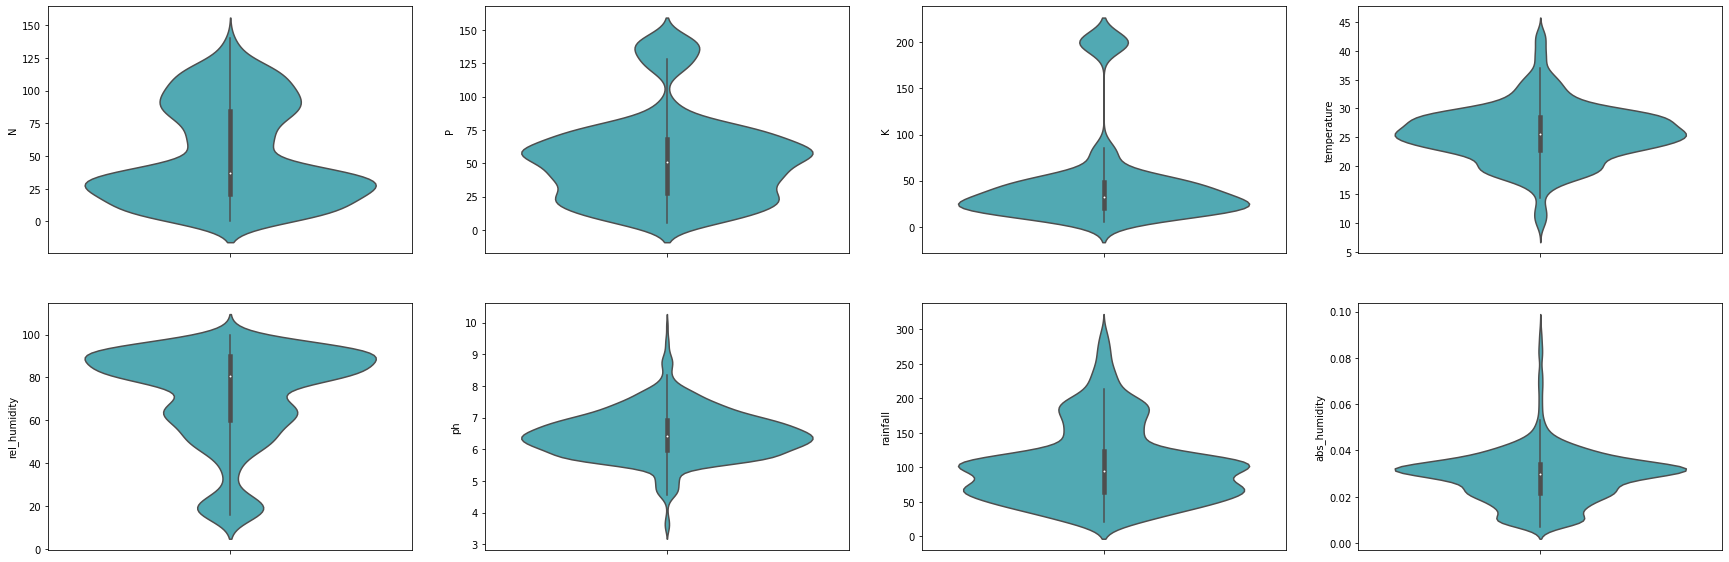

In [16]:
plt.figure(figsize=(30,10))

i = 1
for column in feature_columns:
    plt.subplot(2, 4, i)
    sns.violinplot(y = df[column], palette = "YlGnBu")
    i += 1

plt.show()


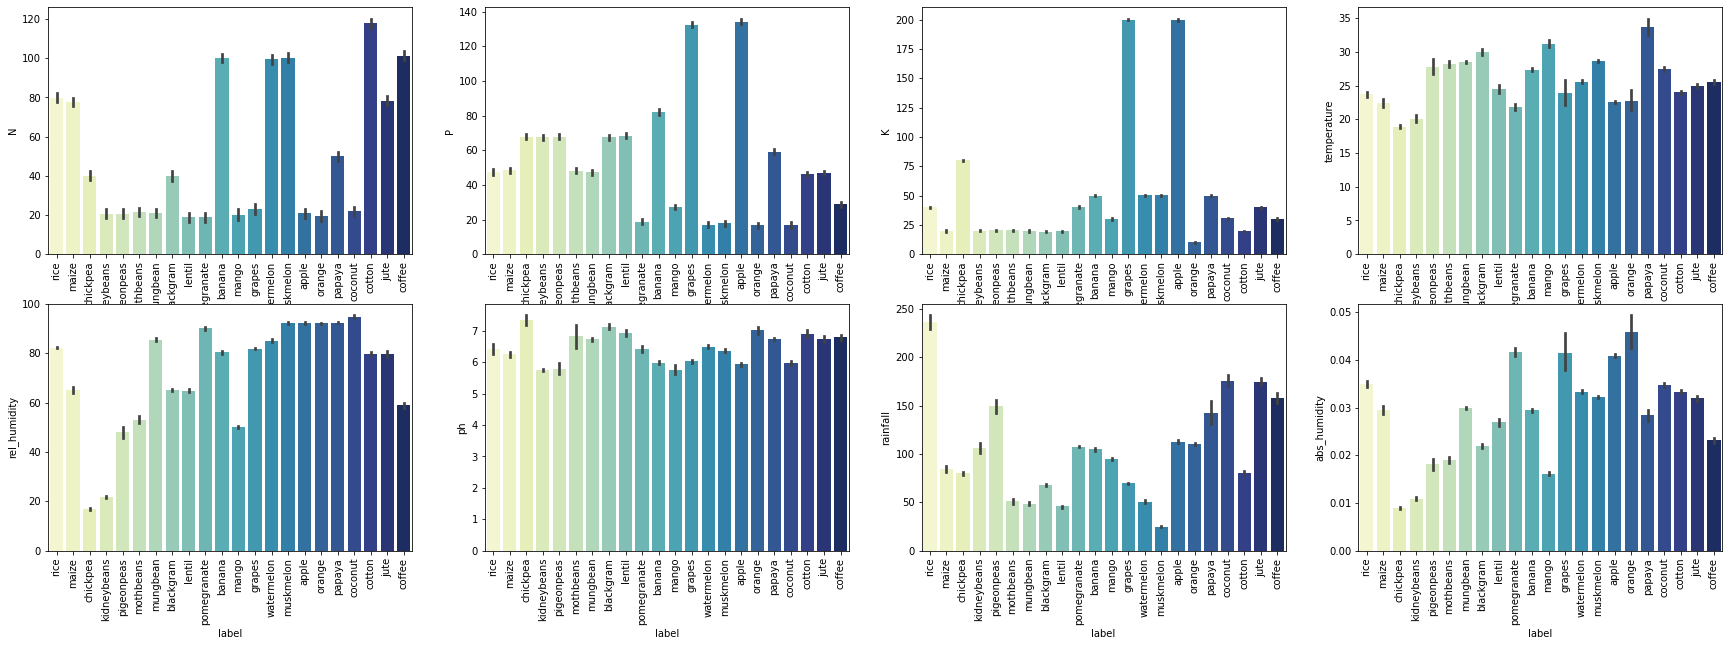

In [17]:
# nutrients vs crop type graph

plt.figure(figsize=(30,10))

graph_columns = ["N", "P", "K"]
i = 1
for column in feature_columns:
    plt.subplot(2,4,i)
    sns.barplot(x = "label", y = column, data = df, palette = "YlGnBu")
    plt.xticks(rotation = 90)
    #plt.title(f"{column} vs Crop Type")
    #plt.xlabel("Crop Type")

    i += 1
plt.show()



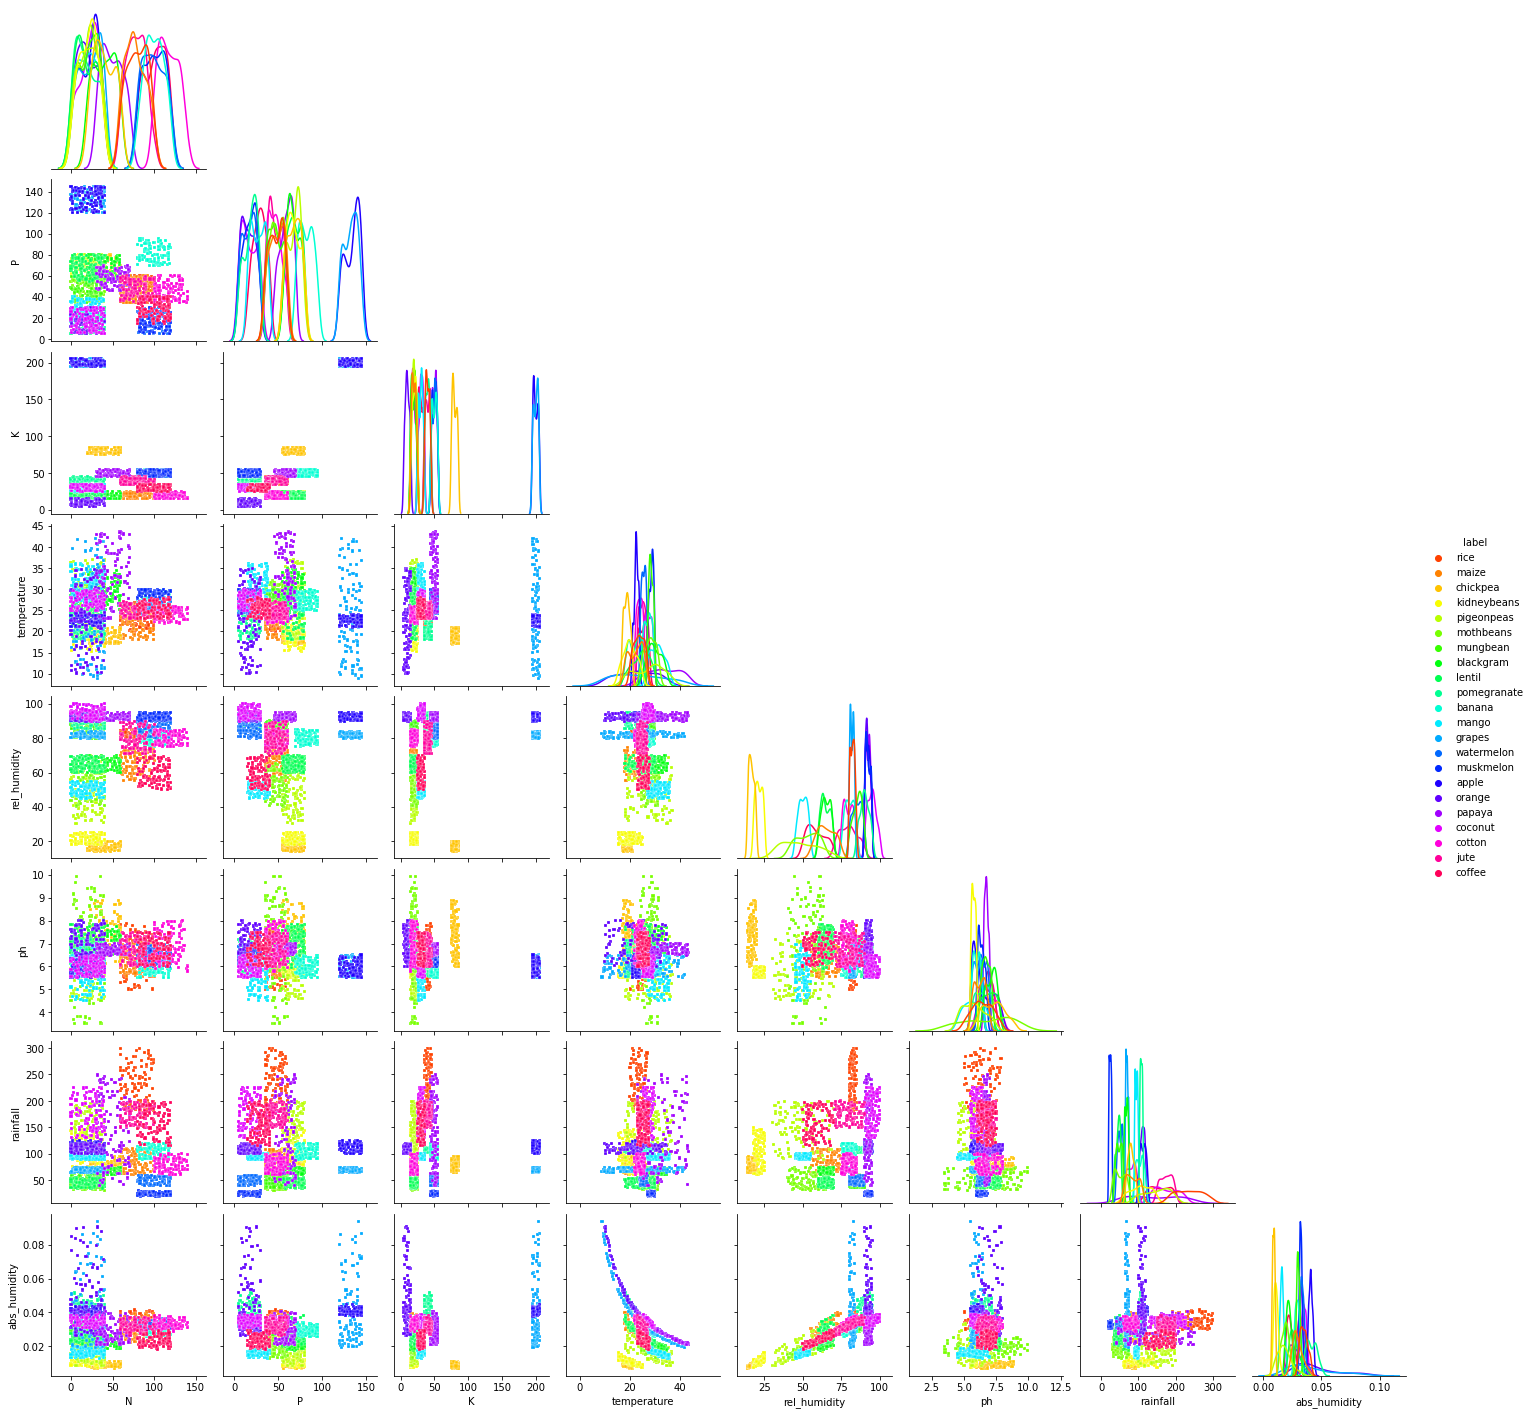

In [18]:
sns.pairplot(
    df, 
    hue = "label", 
    corner = True, 
    plot_kws = { "marker" : ",", "s" : 10},
    diag_kws = {"fill" : False},
    palette = "hsv"
    
    )

## Exploratory Data Analysis

In [19]:
print("Which crops require high ratio (>120) of Nitrogen content in soil ? \t{}" .format(df[df['N'] > 120]['label'].unique()))
print("Which crops require high ratio (>100) of Phosphorus content in soil ? \t{}" .format(df[df['P'] > 100]['label'].unique()))
print("Which crops require high ratio (>200) of Potassium content in soil ? \t{}" .format(df[df['K'] > 200]['label'].unique()))

print("Which crops require high (>200) rainfall ? \t{}" .format(df[df['rainfall'] > 200]['label'].unique()))
print("Which crops require low (<30) rainfall ? \t{}" .format(df[df['rainfall'] < 30]['label'].unique()))

print("Which crops can grow under low (<10) temperature ? \t{}" .format(df[df['temperature'] < 10]['label'].unique()))
print("Which crops can grow under high (>35) temperature ? \t{}" .format(df[df['temperature'] > 35]['label'].unique()))


print("Which crops can survive acidic (<5) soil?\t{}" .format(df[df['ph'] < 5]['label'].unique()))
print("Which crops can survive basic (>9) soil?\t{}" .format(df[df['ph'] > 9]['label'].unique()))

Which crops require high ratio (>120) of Nitrogen content in soil ? 	['cotton']
Which crops require high ratio (>100) of Phosphorus content in soil ? 	['grapes' 'apple']
Which crops require high ratio (>200) of Potassium content in soil ? 	['grapes' 'apple']
Which crops require high (>200) rainfall ? 	['rice' 'papaya' 'coconut']
Which crops require low (<30) rainfall ? 	['muskmelon']
Which crops can grow under low (<10) temperature ? 	['grapes']
Which crops can grow under high (>35) temperature ? 	['pigeonpeas' 'mango' 'grapes' 'papaya']
Which crops can survive acidic (<5) soil?	['pigeonpeas' 'mothbeans' 'mango']
Which crops can survive basic (>9) soil?	['mothbeans']


In [20]:
# finding best suitable crops for different seasons

print("Summer Crops")
print(df[(df['temperature'] > 30) & (df['rel_humidity'] > 60)]['label'].unique())
print("Rain loving Crops")
print(df[(df['rainfall'] > 200) & (df['rel_humidity'] > 30)]['label'].unique())



Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'grapes' 'orange' 'papaya']
Rain loving Crops
['rice' 'papaya' 'coconut']


<Figure size 2160x720 with 0 Axes>

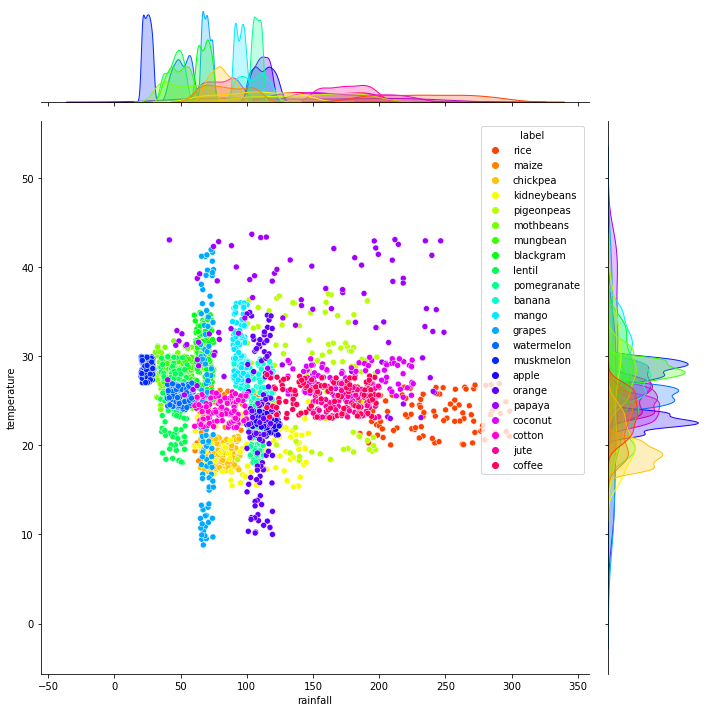

In [21]:
# rainfall - temperature graph 

plt.figure(figsize=(30,10))
sns.jointplot(x = "rainfall", y = "temperature", data = df, height = 10, hue = "label", palette = "hsv")

Text(0, 0.5, 'pH')

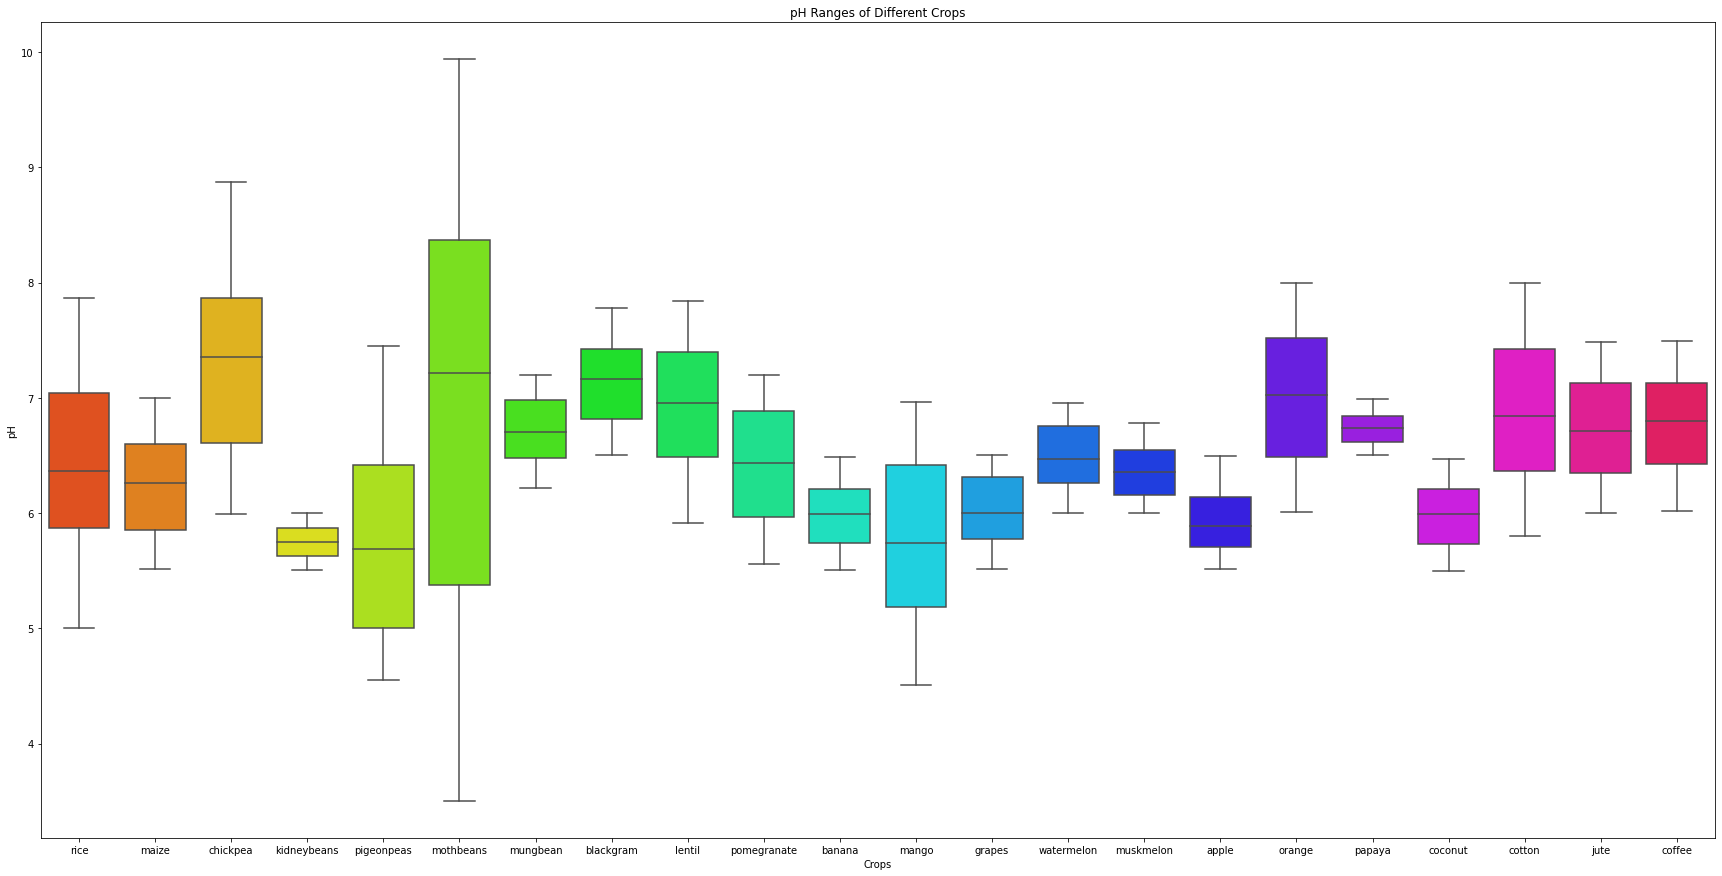

In [22]:
# ph - crop graph
ax = plt.subplots( figsize = (30, 15))
sns.boxplot(data = df, x = "label", y = "ph", palette = "hsv")
plt.title("pH Ranges of Different Crops")
plt.xlabel("Crops")
plt.ylabel("pH")


# Models

## Base Model: Decision Tree

In [23]:
# Initiating arrays that hold results

model = []
accuracy = []
precision = []
recall = []
cross_validation_mean = []



### Decision Tree Gini

In [24]:
decision_tree_gini = tree.DecisionTreeClassifier(criterion = "gini", random_state = 1)
decision_tree_gini.fit(x_train, y_train)
y_dt_gini = decision_tree_gini.predict(x_test)


# metrics
dt_gini_accuracy = accuracy_score(y_test, y_dt_gini)
dt_gini_precision = precision_score(y_test, y_dt_gini, average = "micro")
dt_gini_recall = recall_score(y_test, y_dt_gini, average = "micro")


# append metrics into arrays
model.append("Decision Tree with Gini")
accuracy.append(dt_gini_accuracy)
precision.append(dt_gini_precision)
recall.append(dt_gini_recall)


# print(classification_report(y_test, y_dt_gini))




### Decision Tree Entropy

In [25]:
decision_tree_entropy = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 1)
decision_tree_entropy.fit(x_train, y_train)
y_dt_entropy = decision_tree_entropy.predict(x_test)

# metrics
dt_entropy_accuracy = accuracy_score(y_test, y_dt_entropy)
dt_entropy_precision = precision_score(y_test, y_dt_entropy, average = "micro")
dt_entropy_recall = recall_score(y_test, y_dt_entropy, average = "micro")


# append metrics into arrays
model.append("Decision Tree with Entropy")
accuracy.append(dt_entropy_accuracy)
precision.append(dt_entropy_precision)
recall.append(dt_entropy_recall)

# print(classification_report(y_test, y_dt_entropy))



### Decision Tree Gini Normalized

In [26]:
decision_tree_gini_normalized = tree.DecisionTreeClassifier(criterion = "gini", random_state = 1)
decision_tree_gini_normalized.fit(x_train_normalized, y_train)
y_dt_gini_normalized = decision_tree_gini_normalized.predict(x_test_normalized)


# metrics
dt_gini_normalized_accuracy = accuracy_score(y_test, y_dt_gini_normalized)
dt_gini_normalized_precision = precision_score(y_test, y_dt_gini_normalized, average = "micro")
dt_gini_normalized_recall = recall_score(y_test, y_dt_gini_normalized, average = "micro")


# append metrics into arrays
model.append("Decision Tree with Gini, Normalized")
accuracy.append(dt_gini_normalized_accuracy)
precision.append(dt_gini_normalized_precision)
recall.append(dt_gini_normalized_recall)



#print(classification_report(y_test, y_dt_gini_normalized))


### Decision Tree Entropy Normalized

In [27]:
decision_tree_entropy_normalized = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 1)
decision_tree_entropy_normalized.fit(x_train_normalized, y_train)
y_dt_entropy_normalized = decision_tree_entropy_normalized.predict(x_test_normalized)


# metrics
dt_entropy_normalized_accuracy = accuracy_score(y_test, y_dt_entropy_normalized)
dt_entropy_normalized_precision = precision_score(y_test, y_dt_entropy_normalized, average = "micro")
dt_entropy_normalized_recall = recall_score(y_test, y_dt_entropy_normalized, average = "micro")


# append metrics into arrays
model.append("Decision Tree with Entropy, Normalized")
accuracy.append(dt_entropy_normalized_accuracy)
precision.append(dt_entropy_normalized_precision)
recall.append(dt_entropy_normalized_recall)

#print(classification_report(y_test, y_dt_entropy_normalized))


### Confusion Matrices

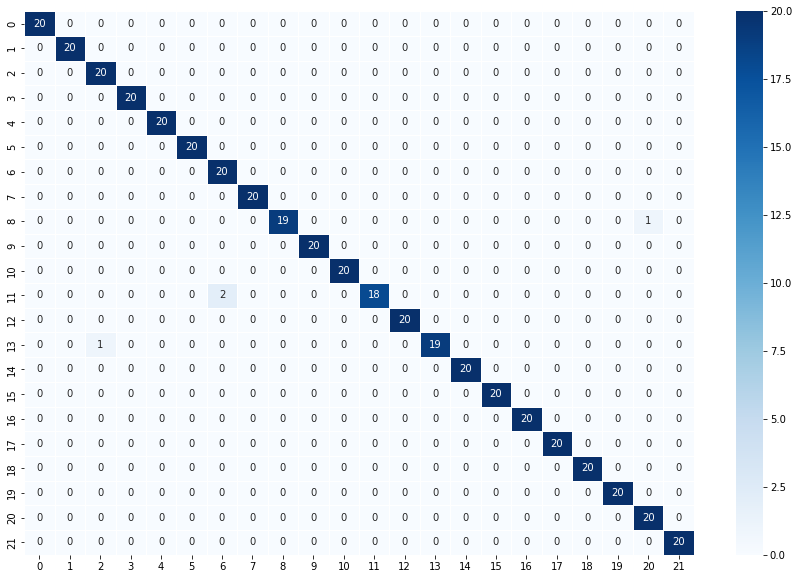

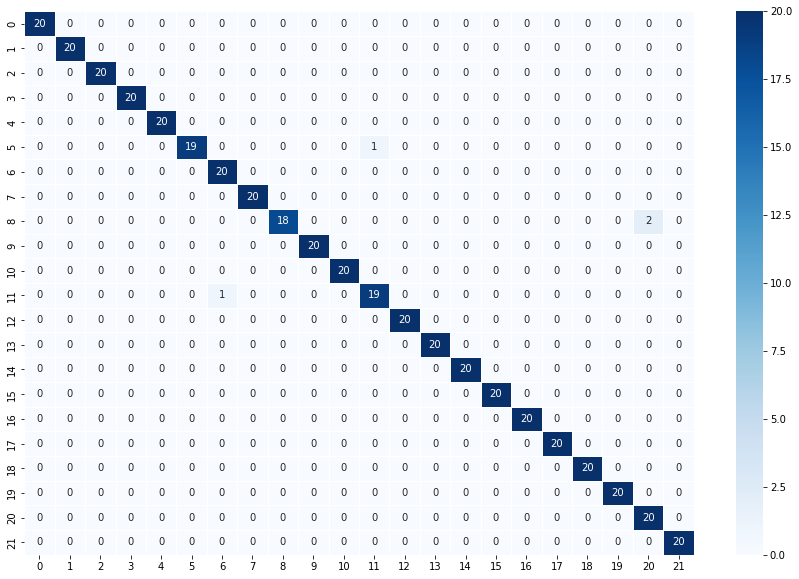

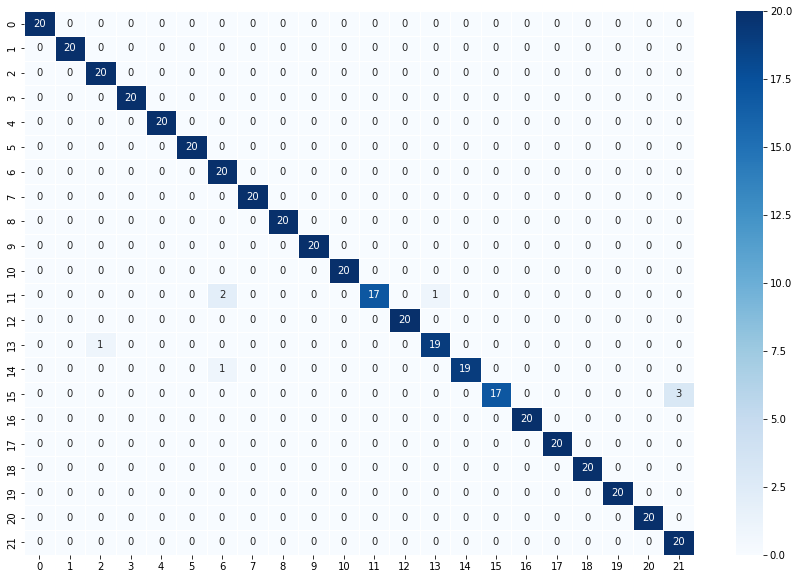

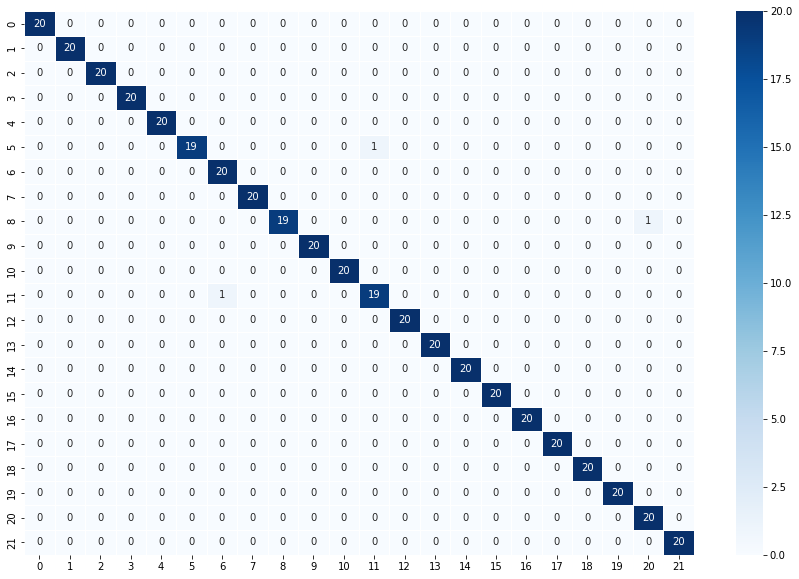

In [28]:
ax = plt.subplots(figsize=(15,10))
cnf_gini = confusion_matrix(y_true = y_test, y_pred = y_dt_gini)
sns.heatmap(cnf_gini, cmap = "Blues", annot = True, linewidths = 0.5)
plt.show()

ax = plt.subplots(figsize=(15,10))
cnf_entropy = confusion_matrix(y_true = y_test, y_pred = y_dt_entropy)
sns.heatmap(cnf_entropy, cmap = "Blues", annot = True, linewidths = 0.5)
plt.show()

ax = plt.subplots(figsize=(15,10))
cnf_gini_normalized = confusion_matrix(y_true = y_test, y_pred = y_dt_gini_normalized)
sns.heatmap(cnf_gini_normalized, cmap = "Blues", annot = True, linewidths = 0.5)
plt.show()

ax = plt.subplots(figsize=(15,10))
cnf_entropy_normalized = confusion_matrix(y_true = y_test, y_pred = y_dt_entropy_normalized)
sns.heatmap(cnf_entropy_normalized, cmap = "Blues", annot = True, linewidths = 0.5)
plt.show()

## Gaussian Naive Bayes


In [29]:
naive_bayes = GaussianNB()

naive_bayes.fit(x_train, y_train)

y_nb = naive_bayes.predict(x_test)

# metrics
nb_accuracy = accuracy_score(y_test, y_nb)
nb_precision = precision_score(y_test, y_nb, average = "micro")
nb_recall = recall_score(y_test, y_nb, average = "micro")


# append metrics into arrays
model.append("Gaussian Naive Bayes")
accuracy.append(nb_accuracy)
precision.append(nb_precision)
recall.append(nb_recall)


# print(classification_report(y_test, y_nb))

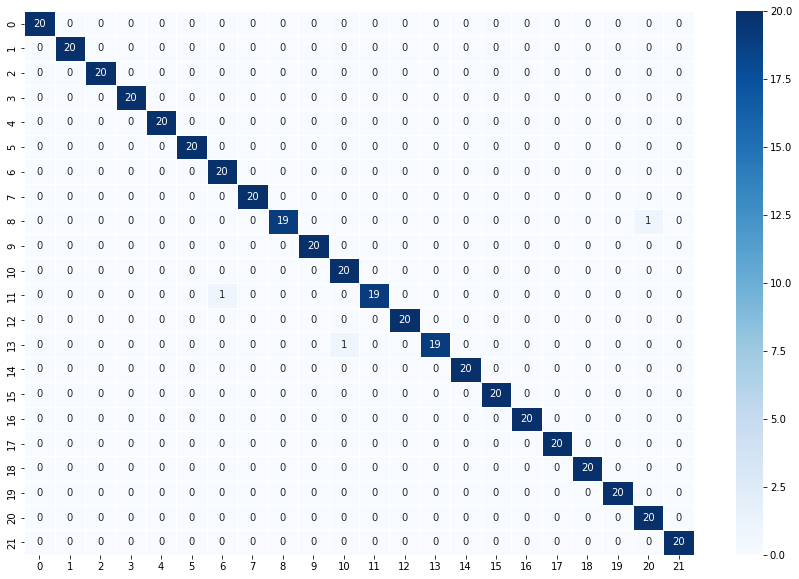

In [30]:
ax = plt.subplots(figsize=(15,10))
cnf_nb = confusion_matrix(y_true = y_test, y_pred = y_nb)
sns.heatmap(cnf_nb, cmap = "Blues", annot = True, linewidths = 0.5)
plt.show()

## Gaussian Naive Bayes, Normalized


In [31]:
naive_bayes_normalized = GaussianNB()

naive_bayes_normalized.fit(x_train_normalized, y_train)

y_nb_normalized = naive_bayes_normalized.predict(x_test_normalized)

# metrics
nb_normalized_accuracy = accuracy_score(y_test, y_nb)
nb_normalized_precision = precision_score(y_test, y_nb, average = "micro")
nb_normalized_recall = recall_score(y_test, y_nb, average = "micro")


# append metrics into arrays
model.append("Gaussian Naive Bayes, Normalized")
accuracy.append(nb_normalized_accuracy)
precision.append(nb_normalized_precision)
recall.append(nb_normalized_recall)


#print(classification_report(y_test, y_nb_normalized))

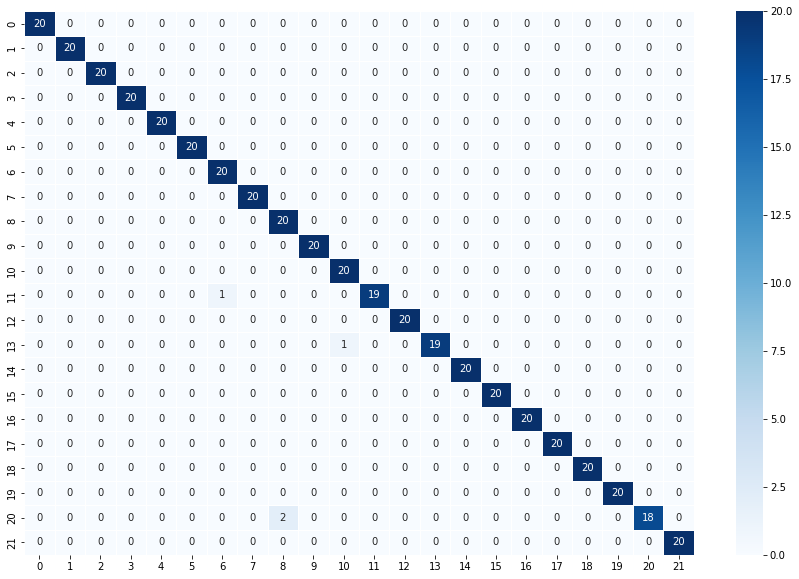

In [32]:
ax = plt.subplots(figsize=(15,10))
cnf_nb_normalized = confusion_matrix(y_true = y_test, y_pred = y_nb_normalized)
sns.heatmap(cnf_nb_normalized, cmap = "Blues", annot = True, linewidths = 0.5)
plt.show()

## SVM

kernel = RBF default
C = 1 default

degree = 3 default on poly

In [33]:
svm = SVC()

svm.fit(x_train, y_train)

y_svm = svm.predict(x_test)

# metrics
svm_accuracy = accuracy_score(y_test, y_svm)
svm_precision = precision_score(y_test, y_svm, average = "micro")
svm_recall = recall_score(y_test, y_svm, average = "micro")


# append metrics into arrays
model.append("Support Vector Machine")
accuracy.append(svm_accuracy)
precision.append(svm_precision)
recall.append(svm_recall)


#print(classification_report(y_test, y_svm))

## SVM, Normalized

In [34]:
svm_normalized = SVC()

svm_normalized.fit(x_train_normalized, y_train)

y_svm_normalized = svm_normalized.predict(x_test_normalized)

# metrics
svm_normalized_accuracy = accuracy_score(y_test, y_svm_normalized)
svm_normalized_precision = precision_score(y_test, y_svm_normalized, average = "micro")
svm_normalized_recall = recall_score(y_test, y_svm_normalized, average = "micro")


# append metrics into arrays
model.append("Support Vector Machine, Normalized")
accuracy.append(svm_normalized_accuracy)
precision.append(svm_normalized_precision)
recall.append(svm_normalized_recall)


#print(classification_report(y_test, y_svm_normalized))

## SVM, Polynomial Kernel of Degree 3, Normalized

In [35]:
svm_poly_normalized_3 = SVC(kernel = "poly", degree = 3)

svm_poly_normalized_3.fit(x_train_normalized, y_train)

y_svm_poly_normalized_3 = svm_poly_normalized_3.predict(x_test_normalized)

# metrics
svm_poly_normalized_3_accuracy = accuracy_score(y_test, y_svm_poly_normalized_3)
svm_poly_normalized_3_precision = precision_score(y_test, y_svm_poly_normalized_3, average = "micro")
svm_poly_normalized_3_recall = recall_score(y_test, y_svm_poly_normalized_3, average = "micro")


# append metrics into arrays
model.append("Support Vector Machine, Polynomial Kernel, degree = 3, Normalized")
accuracy.append(svm_poly_normalized_3_accuracy)
precision.append(svm_poly_normalized_3_precision)
recall.append(svm_poly_normalized_3_recall)


#print(classification_report(y_test, y_svm_poly_normalized_3))

## SVM, Polynomial Kernel of Degree 4, Normalized

In [36]:
svm_poly_normalized_4 = SVC(kernel = "poly", degree = 4)

svm_poly_normalized_4.fit(x_train_normalized, y_train)

y_svm_poly_normalized_4 = svm_poly_normalized_4.predict(x_test_normalized)

# metrics
svm_poly_normalized_4_accuracy = accuracy_score(y_test, y_svm_poly_normalized_4)
svm_poly_normalized_4_precision = precision_score(y_test, y_svm_poly_normalized_4, average = "micro")
svm_poly_normalized_4_recall = recall_score(y_test, y_svm_poly_normalized_4, average = "micro")


# append metrics into arrays
model.append("Support Vector Machine, Polynomial Kernel, degree = 4, Normalized")
accuracy.append(svm_poly_normalized_4_accuracy)
precision.append(svm_poly_normalized_4_precision)
recall.append(svm_poly_normalized_4_recall)


#print(classification_report(y_test, y_svm_poly_normalized_4))

## Random Forest, n = 12


In [37]:
rf_12 = RandomForestClassifier(n_estimators = 12, random_state = 1)
rf_12.fit(x_train, y_train)
y_rf_12 = rf_12.predict(x_test)

# metrics
rf_12_accuracy = accuracy_score(y_test, y_rf_12)
rf_12_precision = precision_score(y_test, y_rf_12, average = "micro")
rf_12_recall = recall_score(y_test, y_rf_12, average = "micro")


# append metrics into arrays
model.append("Random Forest, n = 12")
accuracy.append(rf_12_accuracy)
precision.append(rf_12_precision)
recall.append(rf_12_recall)


#print(classification_report(y_test, y_rf_12))

## Random Forest, n = 25


In [38]:
rf_25 = RandomForestClassifier(n_estimators = 25, random_state = 1)
rf_25.fit(x_train, y_train)
y_rf_25 = rf_25.predict(x_test)

# metrics
rf_25_accuracy = accuracy_score(y_test, y_rf_25)
rf_25_precision = precision_score(y_test, y_rf_25, average = "micro")
rf_25_recall = recall_score(y_test, y_rf_25, average = "micro")


# append metrics into arrays
model.append("Random Forest, n = 25")
accuracy.append(rf_25_accuracy)
precision.append(rf_25_precision)
recall.append(rf_25_recall)


#print(classification_report(y_test, y_rf_25))

## Random Forest, n = 50

In [39]:
rf_50 = RandomForestClassifier(n_estimators = 50, random_state = 1)
rf_50.fit(x_train, y_train)
y_rf_50 = rf_50.predict(x_test)

# metrics
rf_50_accuracy = accuracy_score(y_test, y_rf_50)
rf_50_precision = precision_score(y_test, y_rf_50, average = "micro")
rf_50_recall = recall_score(y_test, y_rf_50, average = "micro")


# append metrics into arrays
model.append("Random Forest, n = 50")
accuracy.append(rf_50_accuracy)
precision.append(rf_50_precision)
recall.append(rf_50_recall)


#print(classification_report(y_test, y_rf_50))

## KNN, k = 5

In [40]:
knn_5 = KNeighborsClassifier()
knn_5.fit(x_train, y_train)
y_knn_5 = knn_5.predict(x_test)


# metrics
knn_5_accuracy = accuracy_score(y_test, y_knn_5)
knn_5_precision = precision_score(y_test, y_knn_5, average = "micro")
knn_5_recall = recall_score(y_test, y_knn_5, average = "micro")


# append metrics into arrays
model.append("K Nearest Neighbor, k = 5")
accuracy.append(knn_5_accuracy)
precision.append(knn_5_precision)
recall.append(knn_5_recall)


#print(classification_report(y_test, y_knn_5))

## KNN, k = 10

In [41]:
knn_10 = KNeighborsClassifier()
knn_10.fit(x_train, y_train)
y_knn_10 = knn_10.predict(x_test)


# metrics
knn_10_accuracy = accuracy_score(y_test, y_knn_10)
knn_10_precision = precision_score(y_test, y_knn_10, average = "micro")
knn_10_recall = recall_score(y_test, y_knn_10, average = "micro")


# append metrics into arrays
model.append("K Nearest Neighbor, k = 10")
accuracy.append(knn_10_accuracy)
precision.append(knn_10_precision)
recall.append(knn_10_recall)


#print(classification_report(y_test, y_knn_10))

# Comparing Metrics

## Calculating Metrics & adding into arrays

In [42]:
cv_score_gini = cross_val_score(decision_tree_gini, x, y)
cv_score_entropy = cross_val_score(decision_tree_entropy, x, y)
cv_score_gini_normalized = cross_val_score(decision_tree_gini_normalized, x, y)
cv_score_entropy_normalized = cross_val_score(decision_tree_entropy_normalized, x, y)

cv_score_nb = cross_val_score(naive_bayes, x, y)
cv_score_nb_normalized = cross_val_score(naive_bayes_normalized, x, y)

cv_score_svm = cross_val_score(svm, x, y)
cv_score_svm_normalized = cross_val_score(svm_normalized, x, y)
cv_score_svm_poly_normalized_3 = cross_val_score(svm_poly_normalized_3, x, y)
cv_score_svm_poly_normalized_4 = cross_val_score(svm_poly_normalized_4, x, y)

cv_score_rf_12 = cross_val_score(rf_12, x, y)
cv_score_rf_25 = cross_val_score(rf_25, x, y)
cv_score_rf_50 = cross_val_score(rf_50, x, y)

cv_score_knn_5 = cross_val_score(knn_5, x, y)
cv_score_knn_10 = cross_val_score(knn_10, x, y)





In [43]:
# append metrics into arrays
cross_validation_mean.append(cv_score_gini.mean())
cross_validation_mean.append(cv_score_entropy.mean())
cross_validation_mean.append(cv_score_gini_normalized.mean())
cross_validation_mean.append(cv_score_entropy_normalized.mean())

cross_validation_mean.append(cv_score_nb.mean())
cross_validation_mean.append(cv_score_nb_normalized.mean())

cross_validation_mean.append(cv_score_svm.mean())
cross_validation_mean.append(cv_score_svm_normalized.mean())
cross_validation_mean.append(cv_score_svm_normalized.mean())
cross_validation_mean.append(cv_score_svm_normalized.mean())

cross_validation_mean.append(cv_score_rf_12.mean())
cross_validation_mean.append(cv_score_rf_25.mean())
cross_validation_mean.append(cv_score_rf_50.mean())

cross_validation_mean.append(cv_score_knn_5.mean())
cross_validation_mean.append(cv_score_knn_10.mean())


In [44]:
# initiating df and importing metrics

result_df = pd.DataFrame(
    list(zip(model, accuracy, precision, recall, cross_validation_mean)),
    columns = ["model", "accuracy", "precision", "recall", "cross_validation_mean"]
                        )


# sorting rows by increasing values for polishing

result_df_sorted_accuracy = result_df.sort_values(by = "accuracy")
result_df_sorted_cv_mean = result_df.sort_values(by = "cross_validation_mean")





## Comparing Metrics

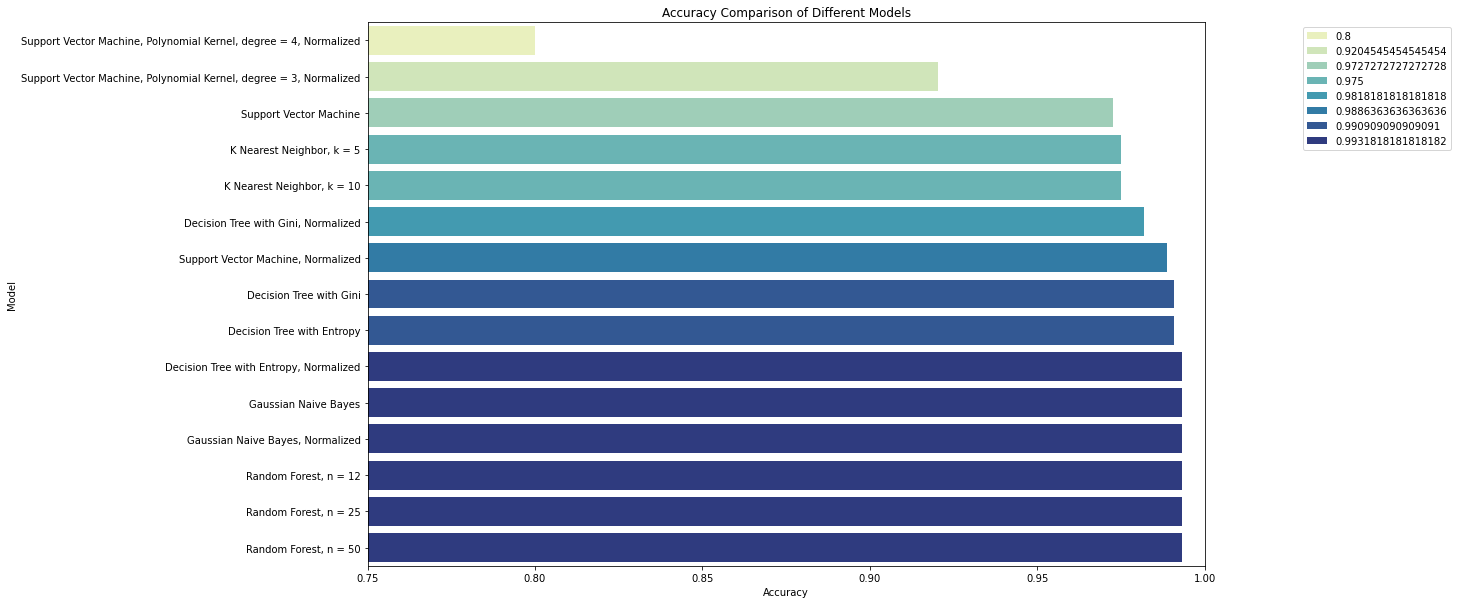

In [45]:
plt.figure(figsize = (15, 10))
plt.xlim(0.75, 1)

ax = sns.barplot(data = result_df_sorted_accuracy, y = "model", x = "accuracy", palette = "YlGnBu", dodge = False, hue = "accuracy")
plt.title("Accuracy Comparison of Different Models")
plt.xlabel("Accuracy")
plt.ylabel("Model")
ax.legend(loc = "upper right", bbox_to_anchor = (1.3,1))


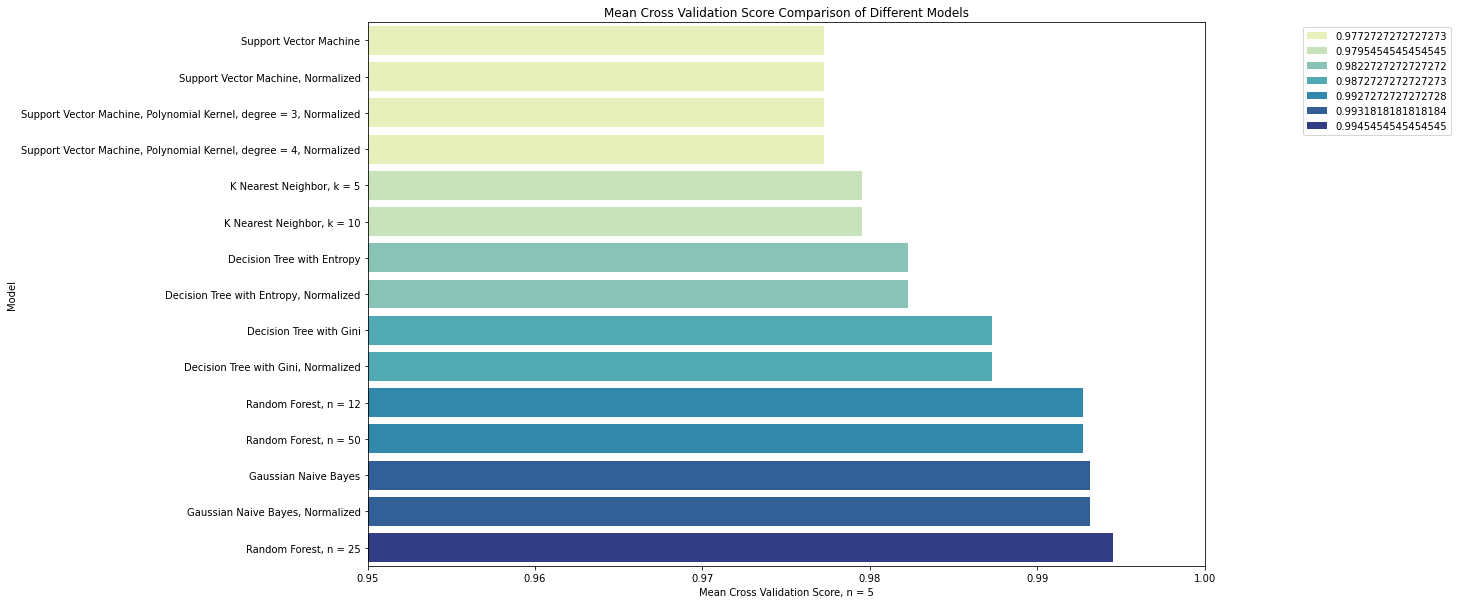

In [46]:
plt.figure(figsize = (15, 10))
plt.xlim(0.95, 1)

ax = sns.barplot(data = result_df_sorted_cv_mean, y = "model", x = "cross_validation_mean", palette = "YlGnBu", dodge = False, hue = "cross_validation_mean")
plt.title("Mean Cross Validation Score Comparison of Different Models")
plt.xlabel("Mean Cross Validation Score, n = 5")
plt.ylabel("Model")
ax.legend(loc = "upper right", bbox_to_anchor = (1.3,1))



# Hyperparameter Tuning of Random Forest

## Round 1

In [47]:
# number of trees
n_trees = [int(x) for x in np.linspace(start = 5, stop = 500, num = 10)]

# number of features
max_features = ["auto", "sqrt"]

# number of levels
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
max_depth.append(None)

# min no. of samples required to split nodes
min_split = [2, 4, 8, 16]

# min no. of samples required at leaves
min_leaf = [1, 2, 4, 8]

# selecting samples for training the algorithm
bootstrap = [True, False]

# creating the random grid
random_grid = {"n_estimators": n_trees,
               "max_features": max_features,
               "max_depth": max_depth,
               "min_samples_split": min_split,
               "min_samples_leaf": min_leaf,
               "bootstrap": bootstrap}
               
print(random_grid)

{'n_estimators': [5, 60, 115, 170, 225, 280, 335, 390, 445, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, None], 'min_samples_split': [2, 4, 8, 16], 'min_samples_leaf': [1, 2, 4, 8], 'bootstrap': [True, False]}


In [48]:
rf_test = RandomForestClassifier()

rf_tester = RandomizedSearchCV(estimator = rf_test, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)
rf_tester.fit(x_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 4, 8, 16],
                                        'n_estimators': [5, 60, 115, 170, 225,
                                                         280, 335, 390, 445,
                                                         500]},
                   random_state=1, verbose=2)

In [49]:
print(rf_tester.best_params_)

print(rf_tester.best_score_)

{'n_estimators': 60, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
0.9960230477176131


## Round 2

In [50]:
# number of trees
n_trees = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 20)]

# number of features
max_features = ["auto", "sqrt"]

# number of levels
max_depth = [int(x) for x in np.linspace(2, 50, num = 10)]
max_depth.append(None)

# min no. of samples required to split nodes
min_split = [1, 2, 4, 8]

# min no. of samples required at leaves
min_leaf = [1, 2, 4]

# selecting samples for training the algorithm
bootstrap = [True, False]

# creating the random grid
random_grid = {"n_estimators": n_trees,
               "max_features": max_features,
               "max_depth": max_depth,
               "min_samples_split": min_split,
               "min_samples_leaf": min_leaf,
               "bootstrap": bootstrap}
               
print(random_grid)

{'n_estimators': [50, 152, 255, 357, 460, 563, 665, 768, 871, 973, 1076, 1178, 1281, 1384, 1486, 1589, 1692, 1794, 1897, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 7, 12, 18, 23, 28, 34, 39, 44, 50, None], 'min_samples_split': [1, 2, 4, 8], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [51]:
rf_test = RandomForestClassifier()

rf_tester = RandomizedSearchCV(estimator = rf_test, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)
rf_tester.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.88295996 0.99488442 0.99204416 0.99488636        nan        nan
 0.8801226  0.9937487  0.99431753 0.99317988 0.99545325 0.77385154
        nan        nan 0.99488442 0.99488636 0.9937487  0.99431656
        nan 0.99488539        nan 0.99488636        nan 0.99147533
 0.99545422 0.99318084 0.99431559 0.99431656 0.99375161 0.99431559
        nan 0.9937487         nan        nan        nan 0.99374967
 0.99545325 0.88579635 0.9937487  0.99318084        nan 0.99545325
 0.99488442 0.99431753 0.99545422        nan 0.9937487         nan
 0.99488636 0.99431559        nan        nan 0.99374967 0.99545325
 0.99431559 0.99488636        nan        nan 0.9937487  0.99545422
 0.99488442 0.8818194         nan        nan 0.99488539 0.99545422
 0.99431656 0.99602208 0.99545325 0.99431656        nan        nan
        nan 0.99545325 0.99431656        nan 0.993748

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 7, 12, 18, 23, 28, 34,
                                                      39, 44, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [1, 2, 4, 8],
                                        'n_estimators': [50, 152, 255, 357, 460,
                                                         563, 665, 768, 871,
                                                         973, 1076, 1178, 1281,
                                                         1384, 1486, 1589, 1692,
                                                         1794, 1897, 2000]},
                   random_state=1, verbose=2)

In [52]:
print(rf_tester.best_params_)
print(rf_tester.best_estimator_)
print(rf_tester.best_score_)

{'n_estimators': 1589, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 23, 'bootstrap': False}
RandomForestClassifier(bootstrap=False, max_depth=23, min_samples_split=4,
                       n_estimators=1589)
0.9960220786746593


## Round 3

In [53]:
# number of trees
n_trees = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 20)]

# number of features
max_features = ["auto", "sqrt"]

# number of levels
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
max_depth.append(None)

# min no. of samples required to split nodes
min_split = [2, 4, 8]

# min no. of samples required at leaves
min_leaf = [1, 2, 4]

# selecting samples for training the algorithm
bootstrap = [True, False]

# creating the random grid
random_grid = {"n_estimators": n_trees,
               "max_features": max_features,
               "max_depth": max_depth,
               "min_samples_split": min_split,
               "min_samples_leaf": min_leaf,
               "bootstrap": bootstrap}
               
print(random_grid)

{'n_estimators': [200, 242, 284, 326, 368, 410, 452, 494, 536, 578, 621, 663, 705, 747, 789, 831, 873, 915, 957, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, None], 'min_samples_split': [2, 4, 8], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [54]:
rf_test = RandomForestClassifier()

rf_tester = RandomizedSearchCV(estimator = rf_test, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)
rf_tester.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8],
                                        'n_estimators': [200, 242, 284, 326,
                                                         368, 410, 452, 494,
                                                         536, 578, 621, 663,
                                                         705, 747, 789, 831,
                                                         873, 915, 957, 1000]},
                   random_state=1, verbose=2)

In [55]:
print(rf_tester.best_params_)
print(rf_tester.best_estimator_)
print(rf_tester.best_score_)

{'n_estimators': 410, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 16, 'bootstrap': False}
RandomForestClassifier(bootstrap=False, max_depth=16, min_samples_split=8,
                       n_estimators=410)
0.9954542195037338


## Implementing best parameters

In [63]:
rf_best = RandomForestClassifier(bootstrap=False, max_depth=16, min_samples_split=8, n_estimators=410)
rf_best.fit(x_train, y_train)
y_rf_best = rf_best.predict(x_test)

# metrics
rf_best_accuracy = accuracy_score(y_test, y_rf_best)
rf_best_precision = precision_score(y_test, y_rf_best, average = "micro")
rf_best_recall = recall_score(y_test, y_rf_best, average = "micro")


# append metrics into arrays
model.append("Random Forest, n = best")
accuracy.append(rf_best_accuracy)
precision.append(rf_best_precision)
recall.append(rf_best_recall)


#print(classification_report(y_test, y_rf_best))

In [64]:
cv_score_rf_best = cross_val_score(rf_best, x, y)
cross_validation_mean.append(cv_score_rf_best.mean())

In [65]:
# initiating df and importing metrics

result_df = pd.DataFrame(
    list(zip(model, accuracy, precision, recall, cross_validation_mean)),
    columns = ["model", "accuracy", "precision", "recall", "cross_validation_mean"]
                        )


# sorting rows by increasing values for polishing

result_df_sorted_accuracy = result_df.sort_values(by = "accuracy")
result_df_sorted_cv_mean = result_df.sort_values(by = "cross_validation_mean")

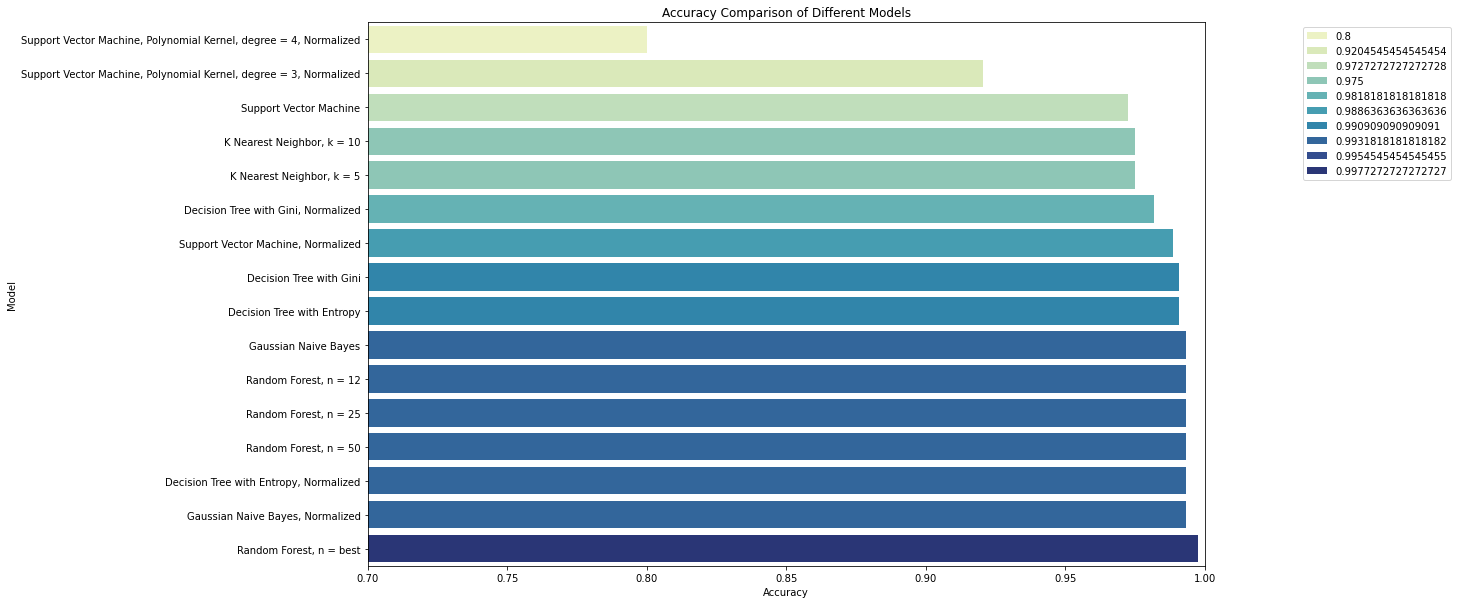

In [66]:
plt.figure(figsize = (15, 10))
plt.xlim(0.7, 1)

ax = sns.barplot(data = result_df_sorted_accuracy, y = "model", x = "accuracy", palette = "YlGnBu", dodge = False, hue = "accuracy")
plt.title("Accuracy Comparison of Different Models")
plt.xlabel("Accuracy")
plt.ylabel("Model")
ax.legend(loc = "upper right", bbox_to_anchor = (1.3,1))


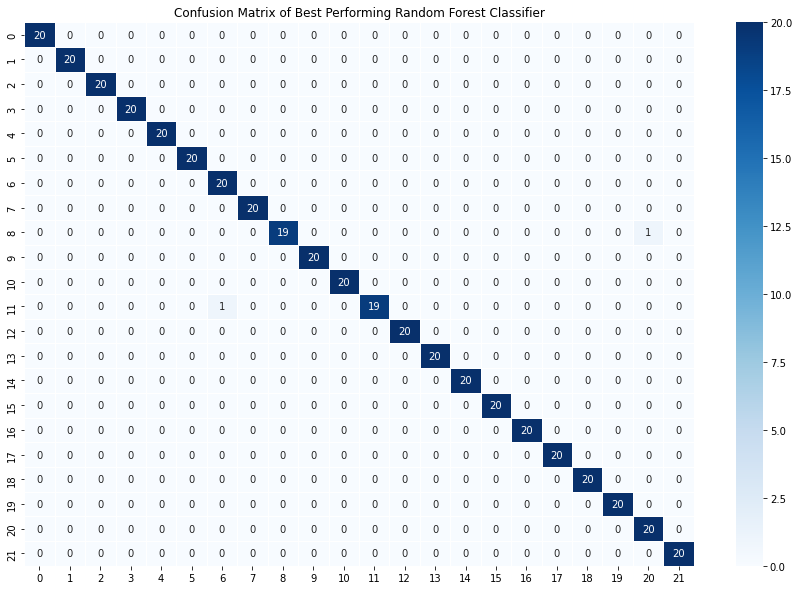

In [70]:
ax = plt.subplots(figsize=(15,10))
cnf_rf_best = confusion_matrix(y_true = y_test, y_pred = y_rf_best)
sns.heatmap(cnf_rf_best, annot = True, linewidths = 0.5, cmap = "Blues" )
plt.title("Confusion Matrix of Best Performing Random Forest Classifier")
plt.show()

In [71]:
#train & test accuracy
rf_best_train_accuracy = rf_best.score(x_train, y_train)
rf_best_test_accuracy = rf_best.score(x_test, y_test)

print(rf_best_train_accuracy)
print(rf_best_test_accuracy)



1.0
0.9954545454545455


# Making Predictions

Units of values to be predicted:

- N, P and K = kg / hectares

- Temperature = degree Celsius

- Relative Humidity = relative humidity in %

- ph = no units

- rainfall = mm

- absolute humidity = grams / m^3

In [72]:
# the order of values are as following: 
# ["N", "P", "K", "temperature", "rel_humidity", "ph", "rainfall", "abs_humidity"]

data_to_be_predicted = np.array([[60, 60, 20, 25, 50, 9, 50, 200]])
prediction = rf_best.predict(data_to_be_predicted)
print(prediction)

['maize']
